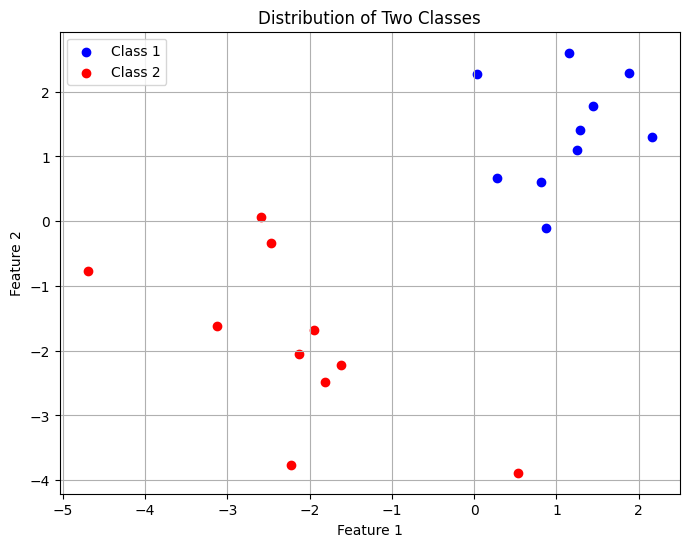

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# 設定兩種類別的參數
np.random.seed(0)  # 設定隨機數種子以便重現結果
class_1_mean = [2, 2]
class_1_cov = [[1, 0.5], [0.5, 1]]
class_2_mean = [-2, -2]
class_2_cov = [[1, -0.5], [-0.5, 1]]
n_samples = 10 # 每種類別的樣本數

# 生成兩種類別的資料
X1 = np.random.multivariate_normal(class_1_mean, class_1_cov, n_samples)
X2 = np.random.multivariate_normal(class_2_mean, class_2_cov, n_samples)

# 合併資料和標籤
X = np.vstack((X1, X2))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

# 視覺化資料
plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], color='blue', label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Distribution of Two Classes')
plt.legend()
plt.grid(True)
plt.show()

每個點的拉格朗日乘數 (α) 的值:
點 1: α = 0.000000
點 2: α = 0.000000
點 3: α = 0.293742
點 4: α = 0.000000
點 5: α = 0.000000
點 6: α = 0.000000
點 7: α = 0.000000
點 8: α = 0.000000
點 9: α = 0.000000
點 10: α = 0.000000
點 11: α = 0.133222
點 12: α = 0.000000
點 13: α = 0.000000
點 14: α = 0.000000
點 15: α = 0.160519
點 16: α = 0.000000
點 17: α = 0.000000
點 18: α = 0.000000
點 19: α = 0.000000
點 20: α = 0.000000

Support Vector 的索引:
[ 2 10 14]

Support Vector 的拉格朗日乘數 (α) 的值:
Support Vector 1: α = 0.293742
Support Vector 2: α = 0.133222
Support Vector 3: α = 0.160519


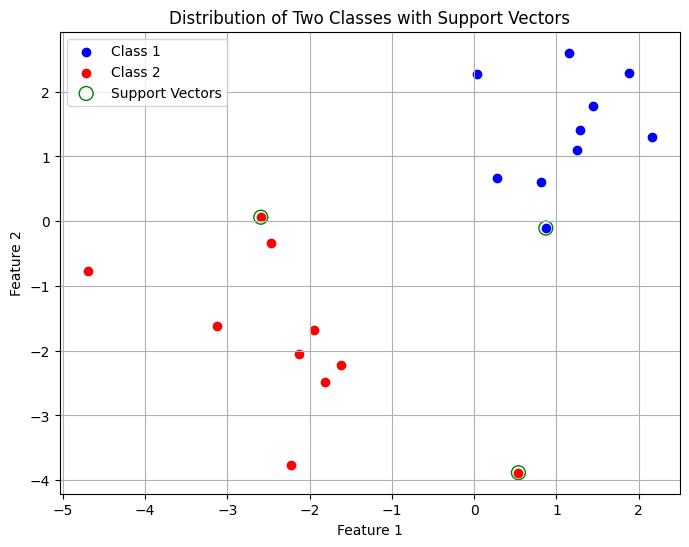

In [70]:
from cvxopt import matrix, solvers

n_samples, n_features = X.shape

# 將標籤從 0 和 1 轉換為 -1 和 1，以符合 cvxopt 的要求
y_solver = np.where(y == 1, 1, -1)

# 計算 Gram 矩陣 K
K = np.dot(X, X.T)

# 定義 P 矩陣
P = matrix(np.outer(y_solver, y_solver) * K)

# 定義 q 向量
q = matrix(np.ones(n_samples) * -1)

# 定義 G 矩陣 (不等式限制條件 -α_i <= 0)
G = matrix(np.diag(np.ones(n_samples) * -1))

# 定義 h 向量
h = matrix(np.zeros(n_samples))

# 定義 A 矩陣 (等式限制條件 sum(α_i * y_i) = 0)
A = matrix(y_solver, (1, n_samples), 'd')

# 定義 b 向量
b = matrix(0.0)

# 求解對偶問題
solvers.options['show_progress'] = False
solution = solvers.qp(P, q, G, h, A, b)
alpha = np.ravel(solution['x'])

# 識別 Support Vector (α > 1e-5)
sv_threshold = 1e-5
support_vector_indices = alpha > sv_threshold
support_vectors = X[support_vector_indices]
support_vector_labels = y[support_vector_indices]
support_vector_alphas = alpha[support_vector_indices]

print("每個點的拉格朗日乘數 (α) 的值:")
for i in range(n_samples):
    print(f"點 {i+1}: α = {alpha[i]:.6f}")

print("\nSupport Vector 的索引:")
print(np.where(support_vector_indices)[0])

print("\nSupport Vector 的拉格朗日乘數 (α) 的值:")
for i in range(len(support_vector_alphas)):
    print(f"Support Vector {i+1}: α = {support_vector_alphas[i]:.6f}")

# 視覺化資料和 Support Vector
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 2')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='green', label='Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Distribution of Two Classes with Support Vectors')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
# 計算權重向量 w
w = np.zeros(n_features)
for i in range(len(support_vector_alphas)):
    # 這裡 support_vector_labels 仍然是 0 和 1，需要轉換為 -1 和 1
    label = 1 if support_vector_labels[i] == 1 else -1
    w += support_vector_alphas[i] * label * support_vectors[i]

print(f"權重向量 w: {w}")

# 計算偏置 b
# 可以選擇任何一個 Support Vector 來計算 b
# 這裡選擇第一個 Support Vector
first_sv_index = np.where(support_vector_indices)[0][0]
first_sv = X[first_sv_index]
first_sv_label = 1 if y[first_sv_index] == 1 else -1

b = first_sv_label - np.dot(w, first_sv)

print(f"偏置 b: {b}")

權重向量 w: [-0.5908532  -0.44413412]
偏置 b: 0.03908579677110291


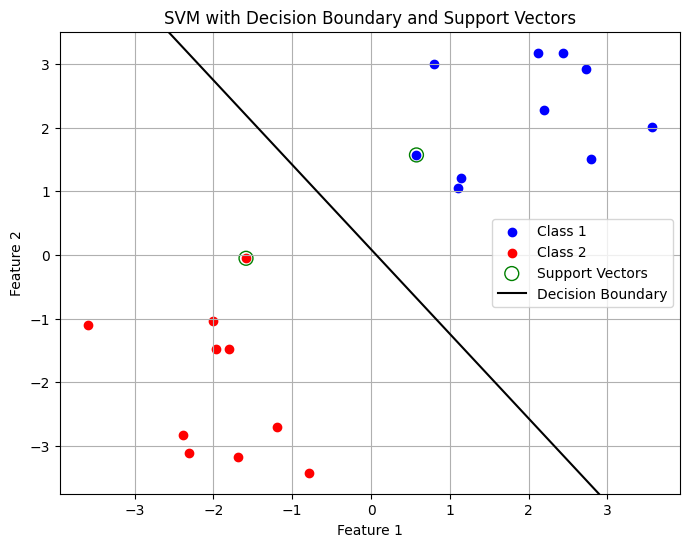

In [59]:
# 視覺化資料、Support Vector 和決策邊界
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 2')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='green', label='Support Vectors')

# 繪製決策邊界
# w[0]*x1 + w[1]*x2 + b = 0
# x2 = (-w[0]*x1 - b) / w[1]
x1_min, x1_max = plt.xlim()
x2_min, x2_max = plt.ylim()

x1_plot = np.linspace(x1_min, x1_max, 100)
if w[1] != 0:
    x2_plot = (-w[0] * x1_plot - b) / w[1]
    plt.plot(x1_plot, x2_plot, color='black', linestyle='-', label='Decision Boundary')
else:
    # 處理 w[1] = 0 的情況 (決策邊界是垂直線)
    plt.axvline(x=-b/w[0], color='black', linestyle='-', label='Decision Boundary')


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Decision Boundary and Support Vectors')
plt.legend()
plt.grid(True)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.show()